In this exercise, I will go through a movie dataset extracted from The Movie Database website, [provided by the Kaggle user 'asaniczka'](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/), and see what kinds of insights that can be extracted by applying some basic descriptive statistics.

In [1]:
import pandas as pd

df = pd.read_csv('tmdb_movie_dataset.csv')

df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


First things first: I loaded the data from a CSV file into a pandas dataframe.

In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070718 entries, 0 to 1070717
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1070718 non-null  int64  
 1   title                 1070706 non-null  object 
 2   vote_average          1070718 non-null  float64
 3   vote_count            1070718 non-null  int64  
 4   status                1070718 non-null  object 
 5   release_date          920961 non-null   object 
 6   revenue               1070718 non-null  int64  
 7   runtime               1070718 non-null  int64  
 8   adult                 1070718 non-null  bool   
 9   backdrop_path         292578 non-null   object 
 10  budget                1070718 non-null  int64  
 11  homepage              115353 non-null   object 
 12  imdb_id               588970 non-null   object 
 13  original_language     1070718 non-null  object 
 14  original_title        1070706 non-

Since I can't assure that the data is clean and ready for any kind of analysis, it is a good practice to probe it, see what kind of data it contains, what are its columns, and whether it contains null values.

In [3]:
print(f'Total number of movies: {len(df)}')
print(f'Number of movies without an average vote value: {len(df[df.vote_average == 0])}')
print(f'Number of movies without a vote count value: {len(df[df.vote_count == 0])}')
print(f'Number of movies without a release date: {len(df[df.release_date.isnull()])}')
not_released = len(df[df.status != 'Released'])
print(f'Number of movies without a \'Released\' status: {not_released}')
print(f'Number of movies with an \'adult\' flag (aka, pornographic movies): {len(df[df.adult])}')

Total number of movies: 1070718
Number of movies without an average vote value: 722240
Number of movies without a vote count value: 722011
Number of movies without a release date: 149757
Number of movies without a 'Released' status: 21371
Number of movies with an 'adult' flag (aka, pornographic movies): 99631


Considering that many of the analyses that will be made later depends on voting data and release date data, it is useful to filter the dataframe based on those parameters. I'm also not interested in movies flagged as "adult" or movies that might be flagged as "not released".

In [4]:
df_filtered = df[(df.vote_average != 0) &
                 (df.vote_count != 0) &
                 ~(df.release_date.isnull()) &
                 (df.adult == False) &
                 (df.status == 'Released')]
df_filtered['release_date'] = pd.to_datetime(df_filtered['release_date'], format='%Y-%m-%d')
print(df_filtered.info())
print(df_filtered.isnull().sum())

<ipython-input-4-30acf96bcd07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['release_date'] = pd.to_datetime(df_filtered['release_date'], format='%Y-%m-%d')


<class 'pandas.core.frame.DataFrame'>
Index: 322117 entries, 0 to 348706
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    322117 non-null  int64         
 1   title                 322117 non-null  object        
 2   vote_average          322117 non-null  float64       
 3   vote_count            322117 non-null  int64         
 4   status                322117 non-null  object        
 5   release_date          322117 non-null  datetime64[ns]
 6   revenue               322117 non-null  int64         
 7   runtime               322117 non-null  int64         
 8   adult                 322117 non-null  bool          
 9   backdrop_path         170500 non-null  object        
 10  budget                322117 non-null  int64         
 11  homepage              47549 non-null   object        
 12  imdb_id               279864 non-null  object        
 13  orig

On top of filtering the dataframe, I've also changed the release date from a string data type to a datetime data type. I'm not sure why just yet, but personally I believe it is good practice, that doing so could avoid future issues.

In [5]:
df_final = df_filtered.drop(columns=['status', 'adult', 'backdrop_path', 'homepage', 'overview', 'poster_path', 'tagline'])
df_final = df_final.drop(columns=['imdb_id', 'original_language', 'original_title', 'popularity', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords'])
print(df_final.info())
print(df_final.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 322117 entries, 0 to 348706
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322117 non-null  int64         
 1   title         322117 non-null  object        
 2   vote_average  322117 non-null  float64       
 3   vote_count    322117 non-null  int64         
 4   release_date  322117 non-null  datetime64[ns]
 5   revenue       322117 non-null  int64         
 6   runtime       322117 non-null  int64         
 7   budget        322117 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 22.1+ MB
None
id              0
title           0
vote_average    0
vote_count      0
release_date    0
revenue         0
runtime         0
budget          0
dtype: int64


The original dataframe included a lot of data that are mostly useless, like backdrop path and poster path, so I dropped those columns.

I spotted a couple of more columns that could potentially generate some interesting insights, like production companies or TMDB's own popularity metric. But for the purposes of this exercise those were also deemed not necessary and dropped as well.

In [6]:
df_final.iloc[:, 1:].describe().drop('count')

,vote_average,vote_count,release_date,revenue,runtime,budget
mean,5.980193,66.447291,1997-01-06 23:52:02.826798848,2.236023e+06,68.268365,8.476855e+05
min,0.500000,1.000000,1865-01-01 00:00:00,-1.200000e+01,0.000000,0.000000e+00
25%,5.000000,1.000000,1984-05-14 00:00:00,0.000000e+00,16.000000,0.000000e+00
50%,6.000000,3.000000,2007-09-20 00:00:00,0.000000e+00,83.000000,0.000000e+00
75%,7.000000,9.000000,2016-10-21 00:00:00,0.000000e+00,97.000000,0.000000e+00
max,10.000000,34495.000000,2024-08-01 00:00:00,3.000000e+09,14400.000000,4.600000e+08
std,1.908014,595.666372,NaN,3.065415e+07,63.241836,8.065202e+06


A few things stand out right from the start, just by looking at the dataframe "describe table":

- There is a significant difference between the vote count's third quartile (75%) and its max value.
- The runtime's maximum value is considerably bigger than the third quartile.

But before we get into those points, one other detail stood out...

In [7]:
df_final.sort_values(by='revenue', ascending=False).head(5)

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget
317252,1270893,TikTok Rizz Party,10.000,1,2024-04-01,3000000000,180,250000000
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000
15,299534,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,181,356000000
282,76600,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,192,460000000
17,597,Titanic,7.900,23637,1997-11-18,2264162353,194,200000000


While probing the data, I stumbled upon this movie called... "TikTok Rizz Party"??? Upon further review, it appears to be an internet meme that at some point was added to TMDB, perhaps jokingly. It has since been deleted from the website, so it's probably safe to delete it from my dataframe.

In [8]:
df_final = df_final.drop(df_final[df_final.id == 1270893].index.values[0])

Begone!

Moving on...

In [9]:
df_final.sort_values(by='runtime', ascending=False).head(10)

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget
198139,251800,Modern Times Forever,7.00,2,2011-03-23,0,14400,0
106010,272074,Cinématon,4.30,6,1978-12-20,0,12480,0
289248,197299,Beijing 2003,1.00,1,2004-01-01,0,9000,0
202594,120474,The Cure For Insomnia,3.50,2,1987-01-31,0,5220,0
99882,368247,#ALLMYMOVIES,7.50,6,2015-11-12,0,4320,0
294407,206026,Giant 600 Cartoon Collection,6.00,1,2008-07-22,0,3720,0
307275,294021,The Longest Most Meaningless Movie in the World,3.00,1,1968-08-08,0,2880,0
233876,454409,Rick Steves' Europe - The Complete Collection,7.00,1,2016-07-10,0,2314,0
318645,240815,Five-Year Diary,10.00,1,1997-01-01,0,2160,0
85175,138829,The Clock,8.75,8,2010-10-15,0,1440,0


Regarding the apparent runtime value discrepancies mentioned earlier, upon review, the data seems to be correct. These movies with seemingly very large runtimes do exist. They're mostly experimental movies and documentaries.

Not quite the type of insight that I initially thought I was going to extract from this dataset, but it is still an insight nonetheless.

In [10]:
import matplotlib.pyplot as plt

To produce the graphs in this exercise, I used the matplotlib library.

In [11]:
df_final.sort_values(by='vote_count', ascending=False).head(10).drop(columns=['id'])

,title,vote_average,vote_count,release_date,revenue,runtime,budget
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000
3,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000
5,Deadpool,7.606,28894,2016-02-09,783100000,108,58000000
6,Avengers: Infinity War,8.255,27713,2018-04-25,2052415039,149,300000000
7,Fight Club,8.438,27238,1999-10-15,100853753,139,63000000
8,Guardians of the Galaxy,7.906,26638,2014-07-30,772776600,121,170000000
9,Pulp Fiction,8.488,25893,1994-09-10,213900000,154,8500000


First, I wanted to look at the vote count, starting with the movies that have the most votes on TMDB. The vote count in this top 10 list is in the 25000 to 35000 value range.

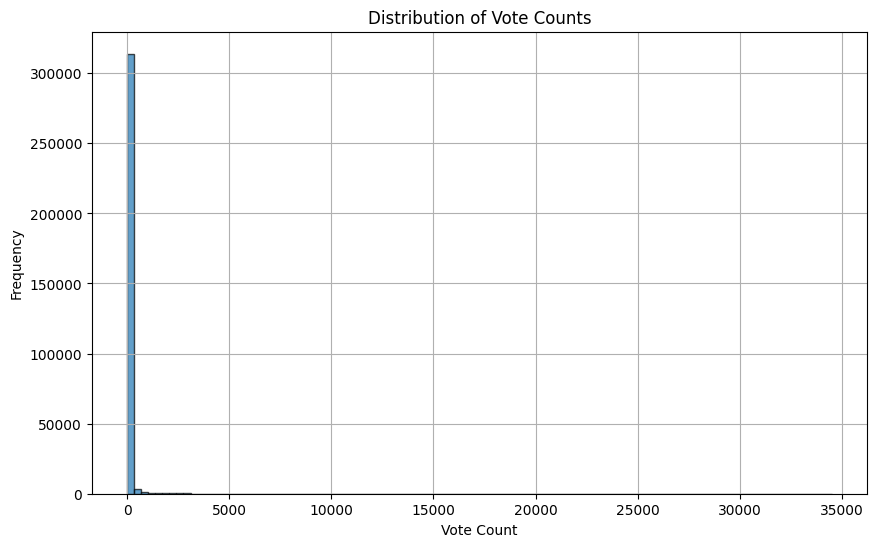

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_final['vote_count'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Counts')
plt.grid(True)
plt.show()

Putting all the data in a histogram graph shows that a large amount of movies on TMDB have very few votes. Looking back at the "describe table", the median value for this data column sits at 6 votes, which is very distant from the values seen at the top 10 list produced previously.

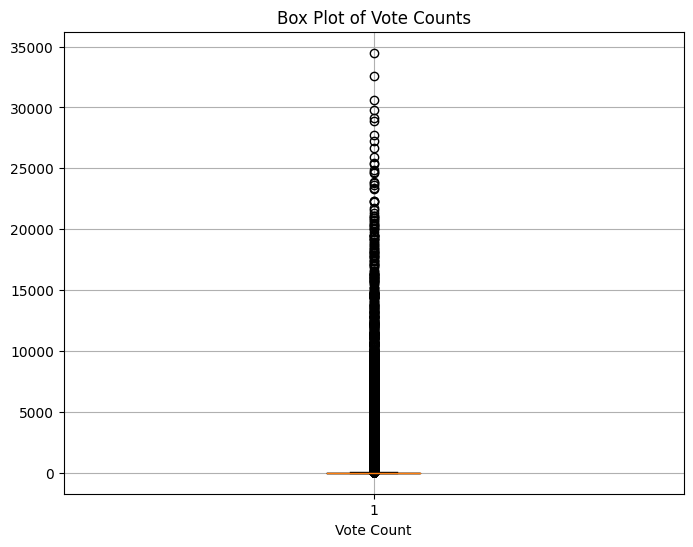

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_final['vote_count'], vert=True)
plt.xlabel('Vote Count')
plt.title('Box Plot of Vote Counts')
plt.grid(True)
plt.show()

This box plot illustrates the discrepancies seen in the "describe table" and the previous graph. The box that represents the values inside the first and third quartile is barely visible.

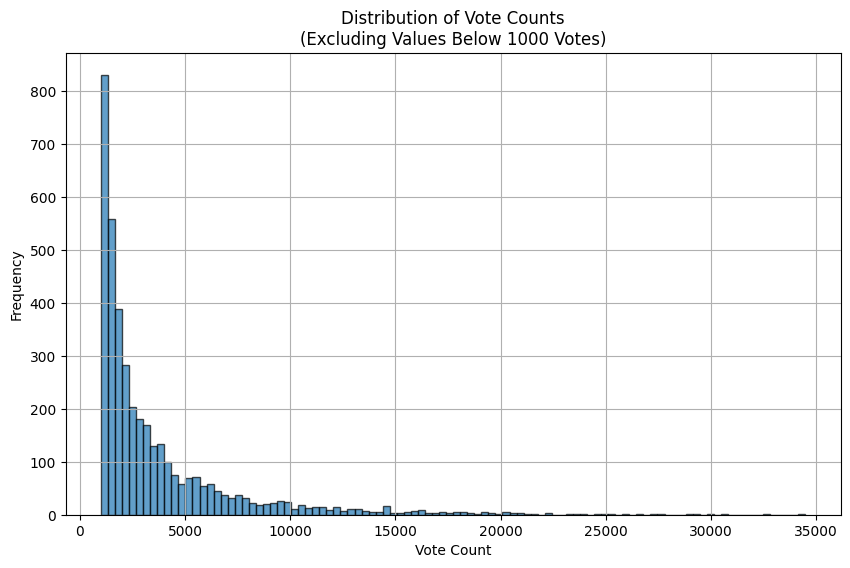

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_final[df_final.vote_count >= 1000]['vote_count'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Counts\n(Excluding Values Below 1000 Votes)')
plt.grid(True)
plt.show()

To make the visualization easier, in this graph I limited the data to movies that have at least 1000 votes. It shows that very few movies manage to break into a five-digit number. Even if you go lower, such as 5000 votes, it is still a threshold too high for most.

A very large portion of movie titles exists unseen to the majority of the website's users.

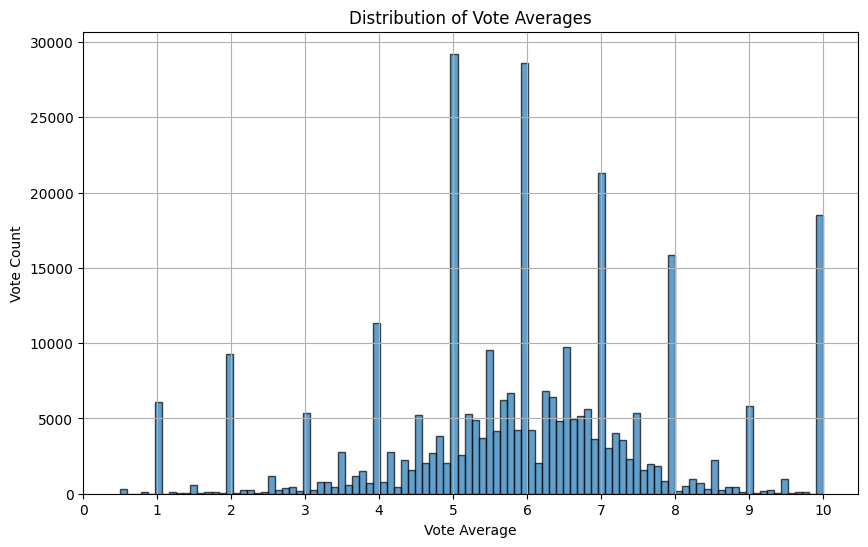

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_final['vote_average'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Vote Average')
plt.xticks(range(0, 11))
plt.ylabel('Vote Count')
plt.title('Distribution of Vote Averages')
plt.grid(True)
plt.show()

Next, I looked at the vote average data. The number of movies rated 10 stand out. Can there really be that many movies with a "perfect rating"?

Of course not. A quick reminder that an average with a low number of samples makes this metric easy to manipulate. And, as seen previously, there is a significant number of movie titles with a very low vote count.

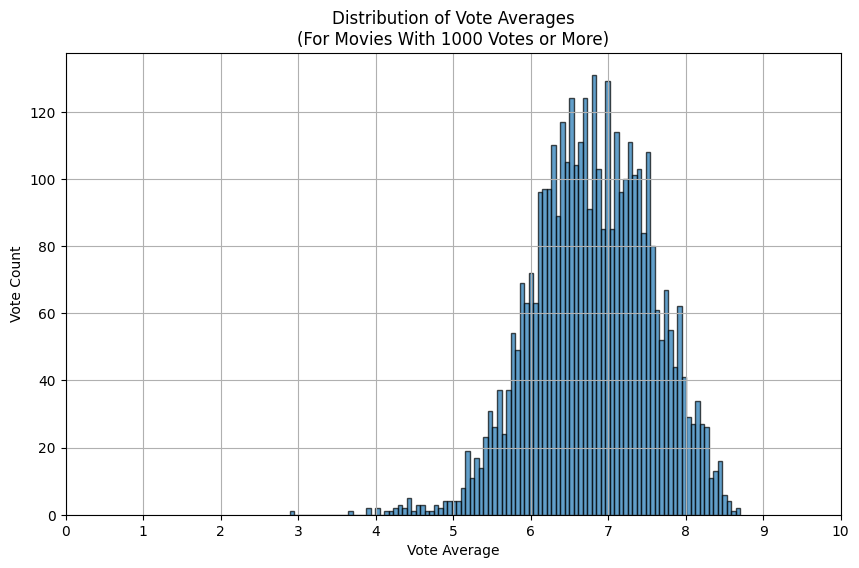

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_final[df_final.vote_count >= 1000]['vote_average'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Vote Average')
plt.xticks(range(0, 11))
plt.ylabel('Vote Count')
plt.title('Distribution of Vote Averages\n(For Movies With 1000 Votes or More)')
plt.grid(True)
plt.show()

Using the value 1000 as the minimum number of votes, the graph for the vote average distribution becomes quite different. A large portion of movies that received at least that many votes sit near the 7/10 rating range.

Most users do not use the full rating scale. One could assume that they do not bother watching or rating movies that they wouldn't consider at least "good" or even "passable" in the first place.

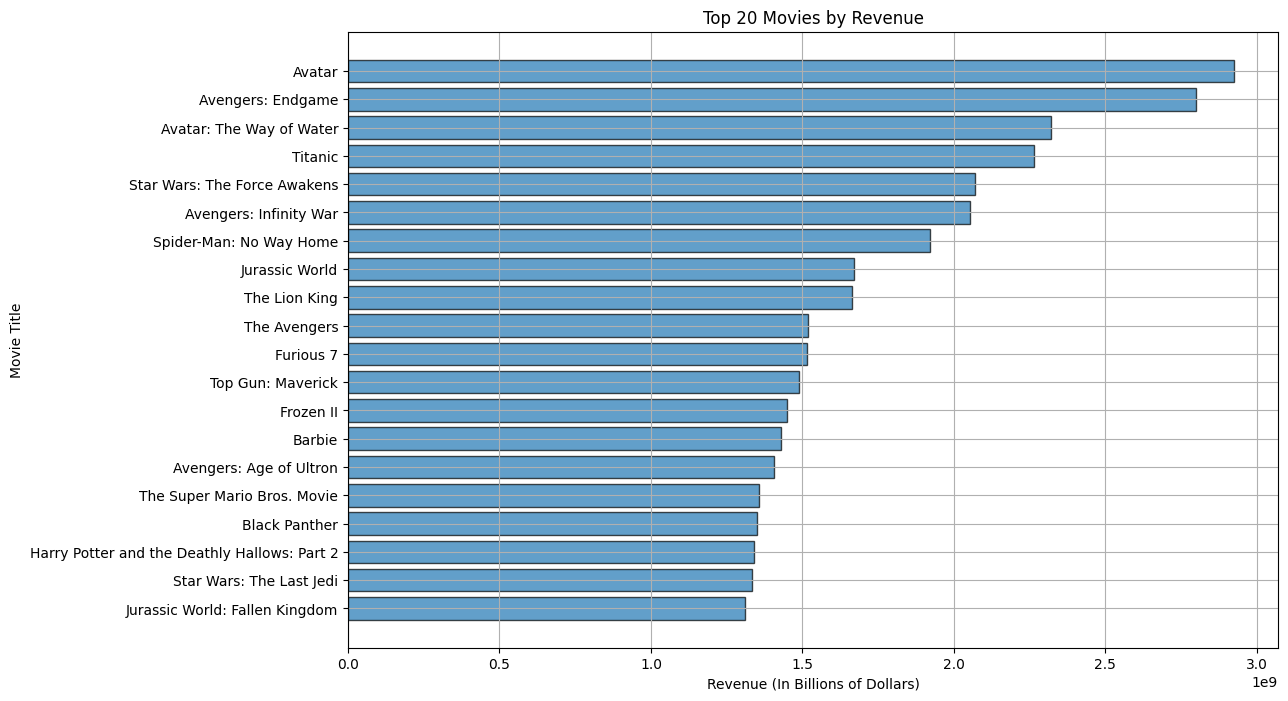

In [17]:
top_revenue = df_final.sort_values(by='revenue', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_revenue['title'], top_revenue['revenue'], alpha=0.7, edgecolor='black')
plt.xlabel('Revenue (In Billions of Dollars)')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Revenue')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

Moving on to the revenue. James Cameron's Avatar and Marvel's Endgame stand out above the rest, but otherwise there is very little surprises here.

I wonder how revenue compares to the ROI (return of investment) metric.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12300 (\N{LEFT CORNER BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12301 (\N{RIGHT CORNER BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


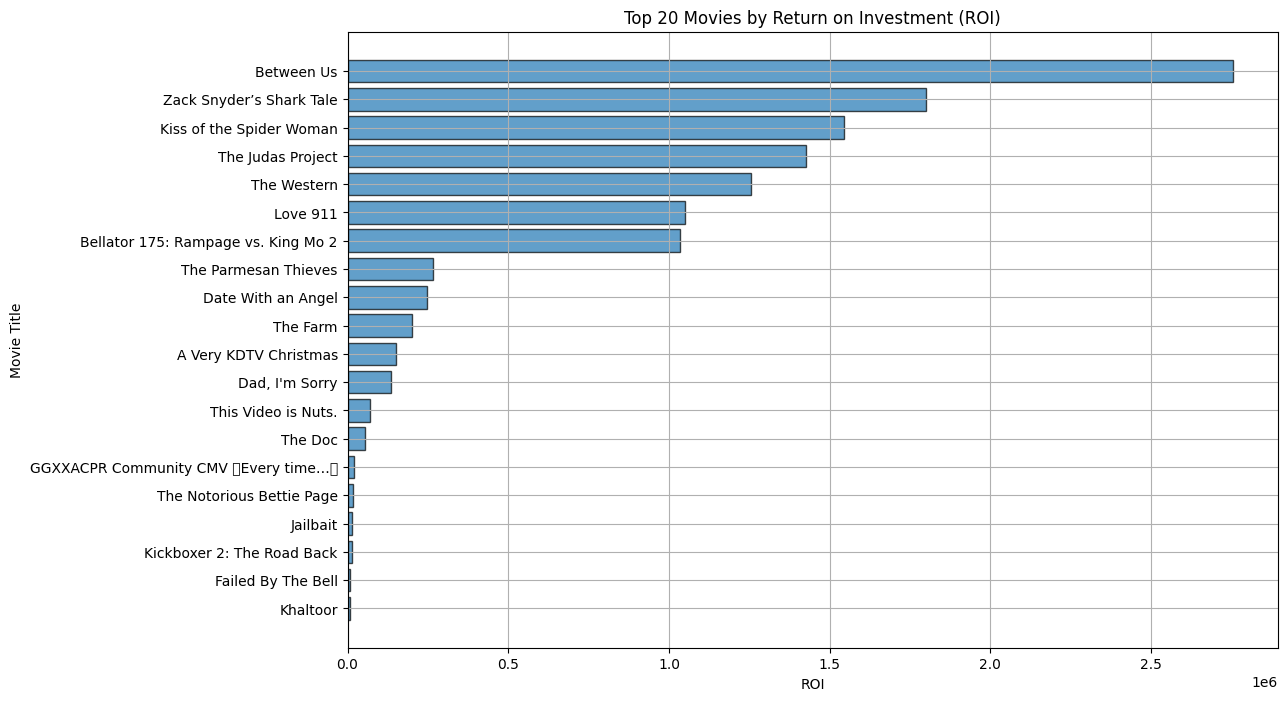

In [18]:
import numpy as np
df_final['roi'] = df_final['revenue'] / df_final['budget']
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=['roi'])

top_roi = df_final.sort_values(by='roi', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_roi['title'], top_roi['roi'], alpha=0.7, edgecolor='black')
plt.xlabel('ROI')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Return on Investment (ROI)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

Hmm... Some rather unusual movies in this list. Could these really be the most lucrative movie titles?

Of course not. TMDB's data on budget and revenue might not be accurate for low popularity movies (as seen in the code above, I had to apply some quick fixes for cases where division by zero occurred). More popular movies have better chances of having more accurate data.

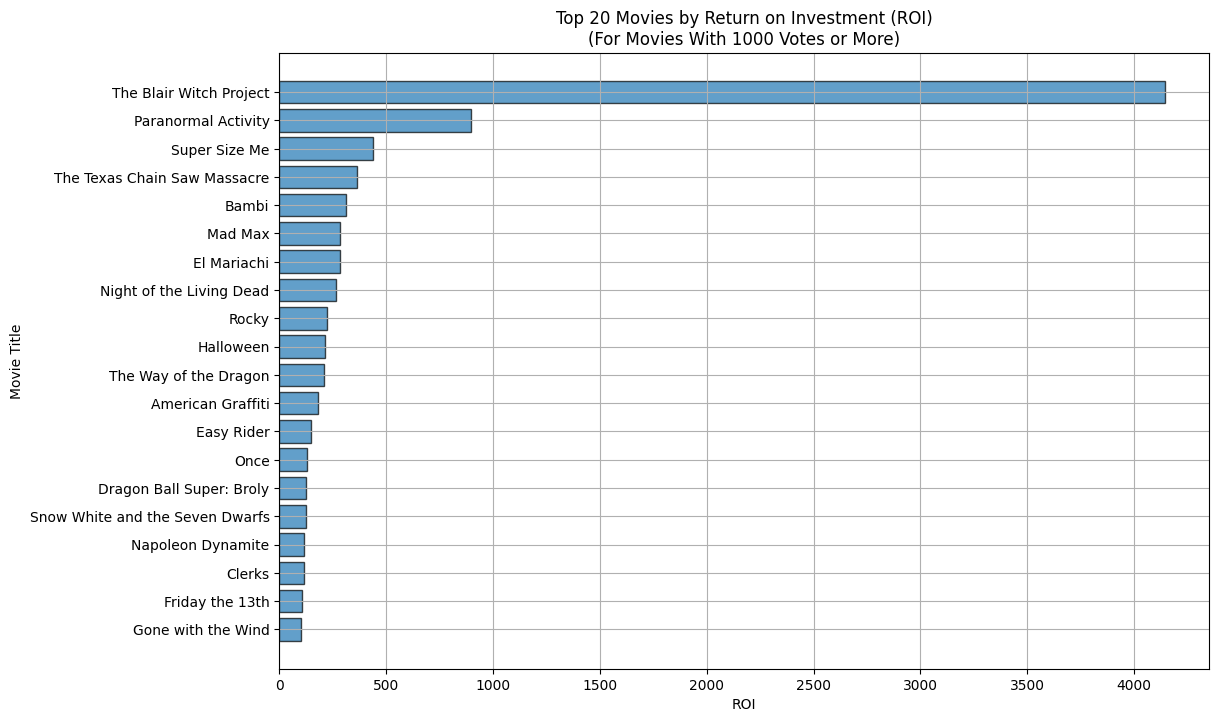

In [19]:
top_roi = df_final[df_final.vote_count >= 1000].sort_values(by='roi', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_roi['title'], top_roi['roi'], alpha=0.7, edgecolor='black')
plt.xlabel('ROI')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Return on Investment (ROI)\n(For Movies With 1000 Votes or More)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

Again, using the value 1000 vote count as the minimum, I drew the graph once more. This time, I actually recognize some of these titles! But it is still quite a different list compared to top revenue list.

This shouldn't come as a surprise. Some movie productions are made with very tight budgets and a few end up becoming worldwide phenomenoms. Low budgets and high revenues result in extremely high ROI's.

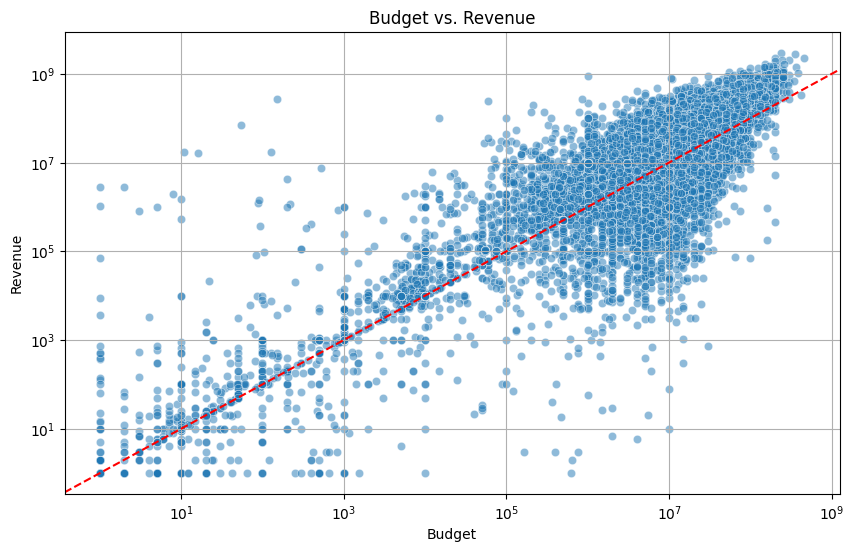

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['budget'], df_final['revenue'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.xscale('log')
plt.yscale('log')
plt.axline((0, 0), (1, 1), color='red', linestyle='--')
plt.grid(True)
plt.show()

Speaking of budget, how does it compare to the revenue? For that, I drew a scatter plot to try to visualize a potential relationship between the two.

Overall, there seems to be an increase in revenue with the budget, as you can almost visualize an upward line (it kinda looks like an arrow, doesn't it). At lower budget values, the points are more spread out, indicating higher uncertainty in this relationship. At higher budget values, they are packed together, though a large number seems to fall below the profitability line (indicated by the red line).

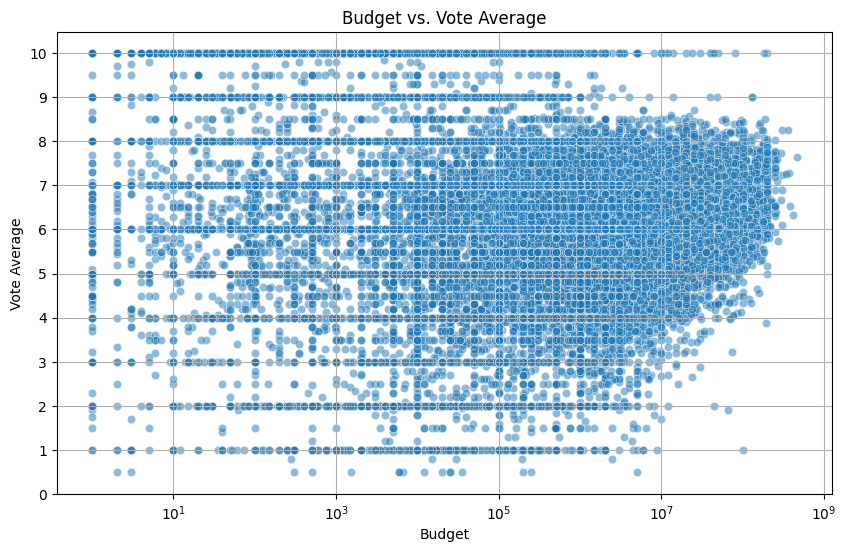

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['budget'], df_final['vote_average'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs. Vote Average')
plt.xscale('log')
plt.yticks(range(0, 11))
plt.grid(True)
plt.show()

Moving on, how does budget and vote average relate? Do higher budgets lead to higher votes on TMDB?

Well, this first graph is a mess. Again, too many movies with low vote counts.

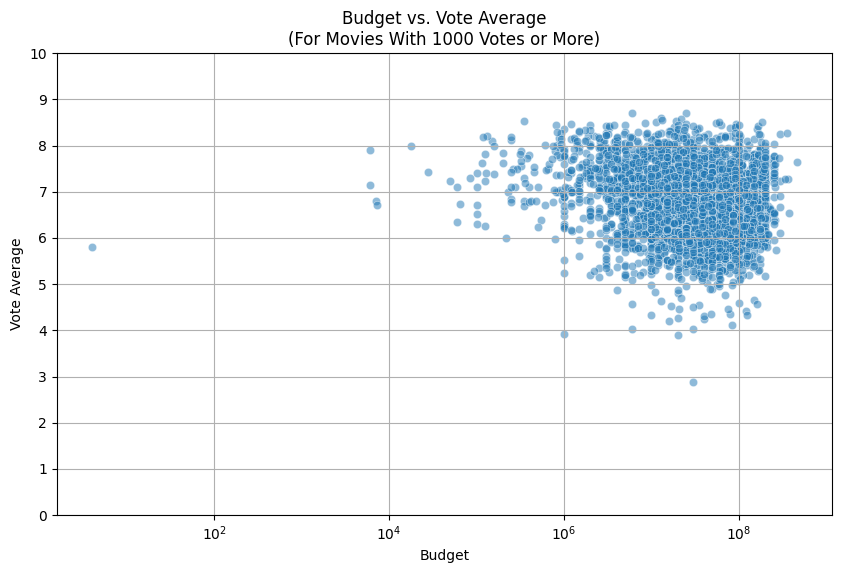

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final[df_final.vote_count >= 1000]['budget'], df_final[df_final.vote_count >= 1000]['vote_average'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.title('Budget vs. Vote Average\n(For Movies With 1000 Votes or More)')
plt.xscale('log')
plt.yticks(range(0, 11))
plt.grid(True)
plt.show()

Once again setting the vote count limit to 1000.

The resulting graph doesn't appear to show any kind of linear tendency like my previous scatter plot attempt. There is seemingly a lot of movies with very high budgets getting both high and middling vote averages.

But it does show that the majority of the votes appear to go to movies with mid to high budgets. Based on this plot, a movie with a budget lower than a million dollars is considerably less likely to catch the eye of a TMDB user.

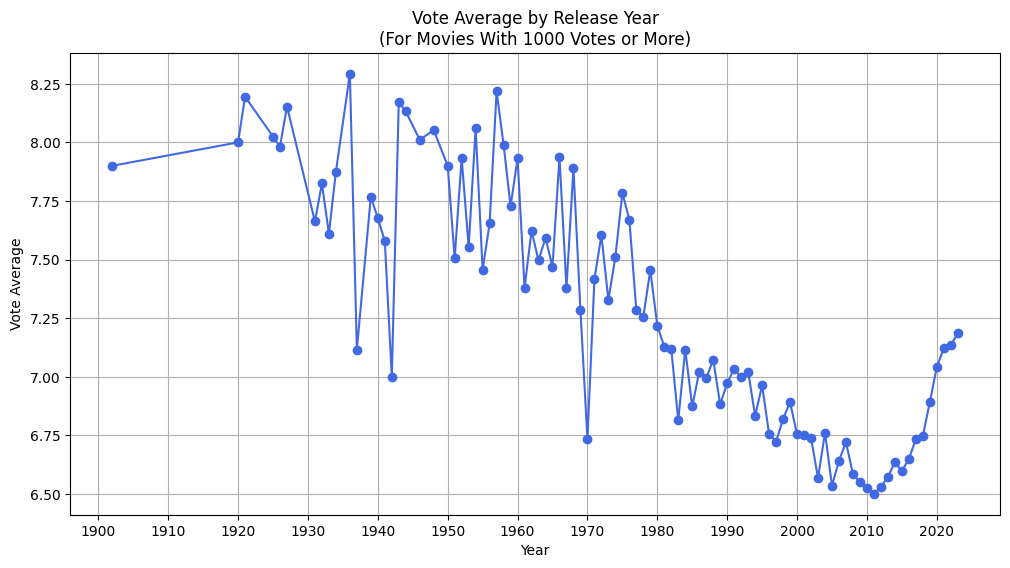

In [38]:
avg_rating_by_year = df_final[df_final.vote_count >= 1000].groupby(df_final['release_date'].dt.year)['vote_average'].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Year')
plt.xticks(range(1900, 2030, 10))
plt.ylabel('Vote Average')
plt.title('Vote Average by Release Year\n(For Movies With 1000 Votes or More)')
plt.grid(True)
plt.show()

Lastly, I looked at the vote average grouped by release year. On a first look, it seems that TMDB users give higher ratings to older movies. Perhaps they treat newer movies more harshly? If that is really the case, then why is there an increase in vote average starting from 2010?

Yet another reminder that averages can be manipulated with a lower denominator. In this case, the denominator represents the number of released movies in each year.

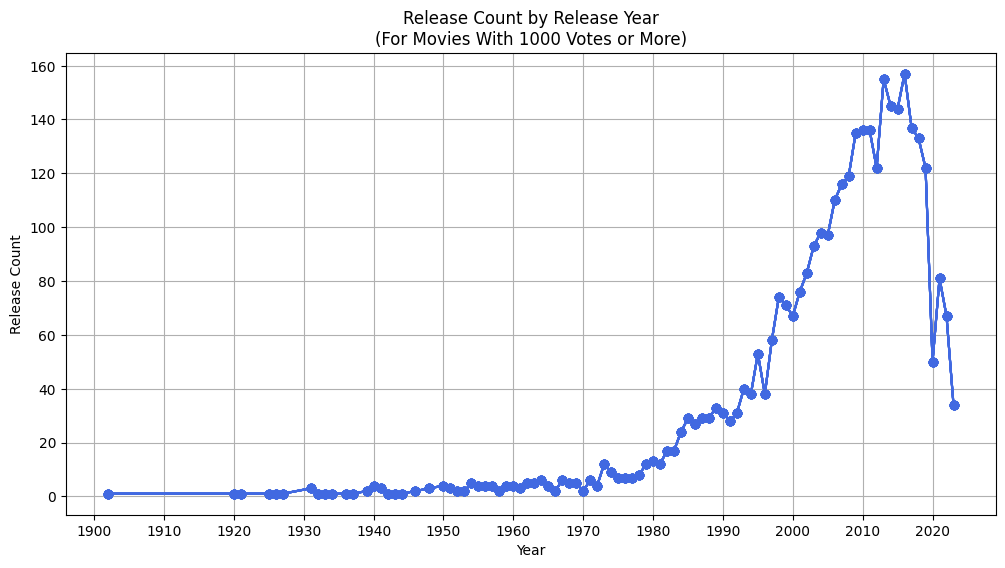

In [39]:
release_count_by_year = df_final[df_final.vote_count >= 1000].groupby(df_final['release_date'].dt.year).count()
plt.figure(figsize=(12, 6))
plt.plot(release_count_by_year.index, release_count_by_year.values, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Year')
plt.xticks(range(1900, 2030, 10))
plt.ylabel('Release Count')
plt.title('Release Count by Release Year\n(For Movies With 1000 Votes or More)')
plt.grid(True)
plt.show()

And here is a graph showing the number of released movies grouped by year. The number of released movies goes into an upward trend, more visible around the 70's, and somwhere in the mid 2010 it goes down drastically. This trend goes against the one shown in the previous graph and can partially explain why certain time periods years have higher averages than others.